### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

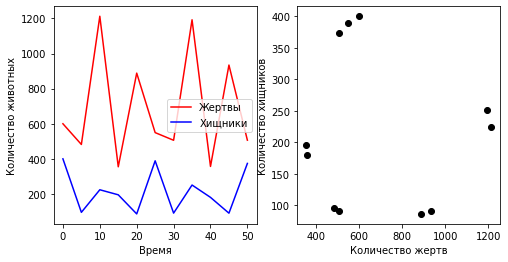

In [396]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 11)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

In [397]:
xy_t



array([[ 600.        ,  400.        ],
       [ 482.01544672,   95.14404455],
       [1212.65065609,  223.8404725 ],
       [ 354.74531806,  195.03859576],
       [ 888.50063994,   86.19786404],
       [ 549.52777223,  388.8033349 ],
       [ 505.87461157,   90.81881634],
       [1192.49602035,  250.78147189],
       [ 356.72818695,  180.45621158],
       [ 934.46517888,   90.40904603],
       [ 506.2877538 ,  373.94805767]])

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и третьего порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

***ваш ответ***

In [398]:
# ваш код РК первого порядка
# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def RK_1(xy_vec0, t, check = 1):
    ans = list()
    ans.append(xy_vec0)
    bad_grabh = 0
    for i in range(len(t) -1):
        step = i+1
        h = t[step] - t[step-1]
        time = float(t[step-1])
        k1 = np.array(f(ans[step-1], time))
        k2 = np.array(f(ans[step-1] +k1*h/3, time + h/3))
        ans_1 = ans[step-1] + h*k2
        if check:
            if abs(ans_1[0] - ans_1[1]) > 2000 or ans_1[1] < 0 or ans_1[0] < 0 :
                bad_grabh = 1
        ans.append([ans_1[0], ans_1[1]])
    return ans, bad_grabh
    #b_2 = 1, c = 1/3,a_21 = 1/3
def RK_3(xy_vec0, t, check = 1):
    ans = list()
    ans.append(xy_vec0)
    bad_grabh = 0
    for i in range(len(t) -1):
        step = i+1
        h = t[step] - t[step-1]
        time = float(t[step-1])
        k1 = np.array(f(ans[step-1], time))
        k2 = np.array(f(ans[step-1] +k1*h/2, time + h/2))
        k3 = np.array(f(ans[step-1] +h*(-k1 +2*k2), time +h))
        ans_1 = ans[step-1] + h*(k1+4*k2+k3)/6
        if check:
            if abs(ans_1[0] - ans_1[1]) > 2000 or ans_1[1] < 0 or ans_1[0] < 0 :
                bad_grabh = 1
        ans.append([ans_1[0], ans_1[1]])
    return ans, bad_grabh
    #a_21 = 1/3, c_1 = 0, c_2 = 1/3, a_31 = -1, a_32 = 2, c_3 = 1, b_1 = 1/6, b_2 = 1/6, b_3 =1/6


In [399]:
# начальные условия
xy_vec0 = [600, 400]
# сетка
n = 2
_ = 1
while(n<1000 and _ == 1):
    n +=1
    t = np.linspace(0, 50, n)
    u_n_1, _ = RK_1(xy_vec0, t)
    u_n_1 =np.array(u_n_1)
print(f"Метод РК первого порядка требует {n} узлов")
print("Соответсвенно, шаг h =", 50/n, "\n")
n_1 = n
n = 2
_ = 1
while(n<1000 and _ == 1):
    n +=1
    t = np.linspace(0, 50, n)
    u_n_3, _ = RK_3(xy_vec0, t)
    u_n_3 =np.array(u_n_3)
print(f"Метод РК первого порядка требует {n} узлов")
print("Соответсвенно, шаг h =", 50/n, "\n")
n_3 = n

Метод РК первого порядка требует 94 узлов
Соответсвенно, шаг h = 0.5319148936170213 

Метод РК первого порядка требует 20 узлов
Соответсвенно, шаг h = 2.5 



<ipython-input-396-2fc34b317d88>:11: RuntimeWarning: overflow encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-396-2fc34b317d88>:11: RuntimeWarning: invalid value encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-398-5e947d19ac2a>:32: RuntimeWarning: invalid value encountered in add
  k3 = np.array(f(ans[step-1] +h*(-k1 +2*k2), time +h))


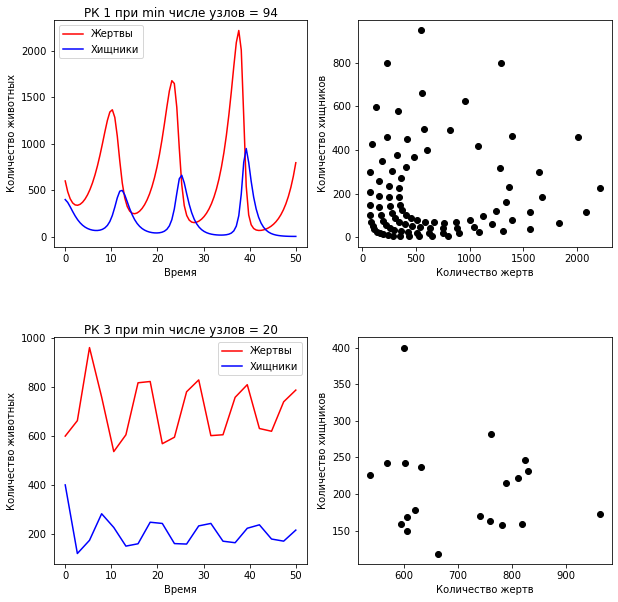

In [400]:
t = np.linspace(0, 50, n_1)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].plot(t, u_n_1[:,0], 'r', label="Жертвы")
axes[0, 0].plot(t, u_n_1[:,1], 'b', label="Хищники")
axes[0, 0].set_xlabel("Время")
axes[0, 0].set_ylabel("Количество животных")
axes[0, 0].set_title(f"РК 1 при min числе узлов = {n_1}", pad = 2)
axes[0, 0].legend()
axes[0,1].plot(u_n_1[:,0], u_n_1[:,1], 'ko')
axes[0,1].set_xlabel("Количество жертв")
axes[0,1].set_ylabel("Количество хищников")
t = np.linspace(0, 50, n_3)
axes[1,0].plot(t, u_n_3[:,0], 'r', label="Жертвы")
axes[1,0].plot(t, u_n_3[:,1], 'b', label="Хищники")
axes[1,0].set_xlabel("Время")
axes[1,0].set_ylabel("Количество животных")
axes[1,0].set_title(f"РК 3 при min числе узлов = {n_3}", pad = 2)
axes[1,0].legend()
axes[1,1].plot(u_n_3[:,0], u_n_3[:,1], 'ko')
axes[1,1].set_xlabel("Количество жертв")
axes[1,1].set_ylabel("Количество хищников")
plt.subplots_adjust(wspace=0.2, hspace=0.4)

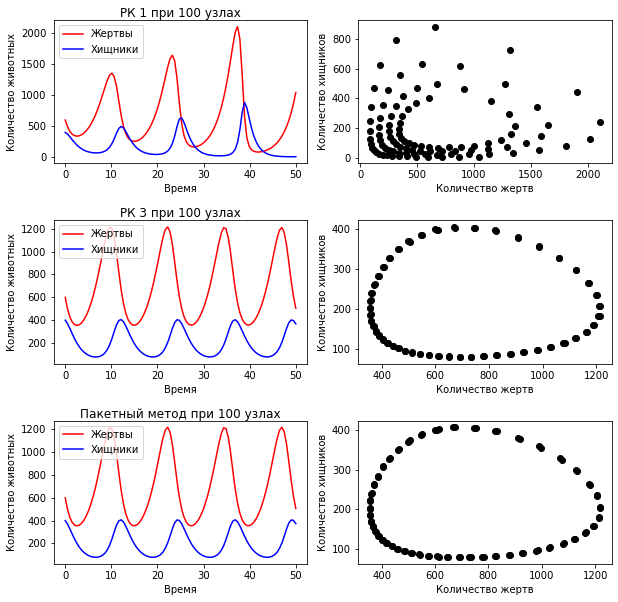

In [401]:
xy_vec0 = [600, 400]
t = np.linspace(0, 50, 100)
xy_t = integrate.odeint(f, xy_vec0, t)
u_n_1, _ = RK_1(xy_vec0, t)
u_n_1 =np.array(u_n_1)
u_n_3, _ = RK_3(xy_vec0, t)
u_n_3 =np.array(u_n_3)
fig, axes = plt.subplots(3,2, figsize=(10, 10))
axes[0, 0].plot(t, u_n_1[:,0], 'r', label="Жертвы")
axes[0, 0].plot(t, u_n_1[:,1], 'b', label="Хищники")
axes[0, 0].set_xlabel("Время")
axes[0, 0].set_ylabel("Количество животных")
axes[0, 0].set_title("РК 1 при 100 узлах", pad = 3)
axes[0, 0].legend()
axes[0,1].plot(u_n_1[:,0], u_n_1[:,1], 'ko')
axes[0,1].set_xlabel("Количество жертв")
axes[0,1].set_ylabel("Количество хищников")
axes[1, 0].plot(t, u_n_3[:,0], 'r', label="Жертвы")
axes[1, 0].plot(t, u_n_3[:,1], 'b', label="Хищники")
axes[1, 0].set_xlabel("Время")
axes[1, 0].set_ylabel("Количество животных")
axes[1, 0].set_title("РК 3 при 100 узлах", pad = 3)
axes[1, 0].legend()
axes[1,1].plot(u_n_3[:,0], u_n_3[:,1], 'ko')
axes[1,1].set_xlabel("Количество жертв")
axes[1,1].set_ylabel("Количество хищников")
axes[2, 0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[2, 0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[2, 0].set_xlabel("Время")
axes[2, 0].set_ylabel("Количество животных")
axes[2, 0].set_title("Пакетный метод при 100 узлах", pad = 3)
axes[2, 0].legend()
axes[2, 1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[2, 1].set_xlabel("Количество жертв")
axes[2, 1].set_ylabel("Количество хищников")
plt.subplots_adjust(wspace=0.2, hspace=0.4)

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке.

In [423]:
def f(xy_vec, t):
    x, y = xy_vec
    return np.array([a*x - b*x*y, c*x*y - d*y])

# начальные условия
xy_vec0 = np.array([600, 400])
def err(h):
    print(h)
    t = np.arange(0, 50, h)
    xy_t = integrate.odeint(f, xy_vec0, t)
    u_n_1, _ = RK_1(xy_vec0, t)
    u_n_1 =np.array(u_n_1)
    u_n_3, _ = RK_3(xy_vec0, t)
    u_n_3 =np.array(u_n_3)
    er_rk1 = [max(abs(xy_t[:,0] - u_n_1[:, 0])), max(abs(xy_t[:,1] - u_n_1[:, 1]))]
    er_rk3 = [max(abs(xy_t[:,0] - u_n_3[:, 0])), max(abs(xy_t[:,1] - u_n_3[:, 1]))]
    return [er_rk1, er_rk3]
h = np.arange(0.01, 2.5, 0.1)
p1= list()
p3 = list()
for i in h:
    err_h = err(i)
    err_h_2 = err(i/2)
    p_rk_1 = np.log((err_h[0][0]+err_h[0][1])/(err_h_2[0][0]+err_h_2[0][1]))
    p_rk_3 = np.log((err_h[1][0]+err_h[1][1])/(err_h_2[1][0]+err_h_2[1][1]))
    p1.append(p_rk_1)
    p3.append(p_rk_3)

    
    

0.01
0.005
0.11
0.055
0.21000000000000002
0.10500000000000001
0.31000000000000005
0.15500000000000003
0.41000000000000003
0.20500000000000002
0.51
0.255
0.6100000000000001
0.30500000000000005
0.7100000000000001
0.35500000000000004
0.81
0.405
0.91
0.455
1.01
0.505
1.11
0.555
1.2100000000000002
0.6050000000000001
1.31
0.655
1.4100000000000001
0.7050000000000001
1.51
0.755
1.61
0.805
1.7100000000000002
0.8550000000000001
1.81
0.905
1.9100000000000001
0.9550000000000001
2.01
1.005
2.11
1.055
2.21
1.105
2.31
1.155
2.41
1.205


<ipython-input-423-b37c615aaf25>:3: RuntimeWarning: overflow encountered in double_scalars
  return np.array([a*x - b*x*y, c*x*y - d*y])
<ipython-input-423-b37c615aaf25>:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([a*x - b*x*y, c*x*y - d*y])
<ipython-input-423-b37c615aaf25>:24: RuntimeWarning: invalid value encountered in double_scalars
  p_rk_1 = np.log((err_h[0][0]+err_h[0][1])/(err_h_2[0][0]+err_h_2[0][1]))


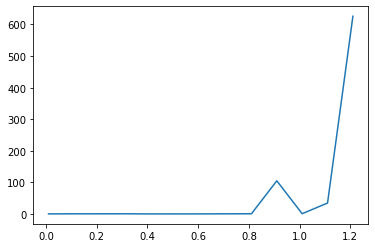

In [424]:
plt.plot(h, p1)

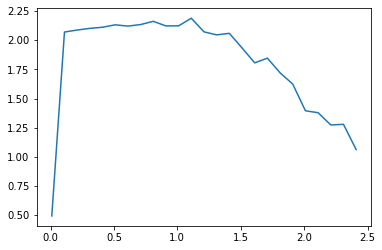

In [426]:
plt.plot(h, p3)

***ваш ответ***